# Predict Credit Card Approval

## Introduction

A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.

Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.  

## Aim:
- Best Machine learning based predictions for credit card approval?
- Perform necessary steps required to improve the accuracy of your model.
- Report characteristics of important features, such as total number and percentage of each category in a table format after performing all relevant tasks.

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from ydata_profiling import ProfileReport
import os

import warnings
warnings.filterwarnings('ignore')

In [89]:
cc_df_raw = pd.read_csv('./Credit_card.csv')
cc_df = cc_df_raw.copy()

In [90]:
data_report = ProfileReport(df=cc_df)
data_report.to_file(output_file='./data_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [91]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [92]:
cc_df.sample(5)
cc_df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [93]:
new_col_names = {"Ind_ID":"ID",
"GENDER":"Gender",
"Car_Owner":"Car_Owner",
"Propert_Owner":"Prop_Owner",
"CHILDREN":"Children",
"Annual_income":"Income",
"Type_Income":"Income_Type",
"EDUCATION":"Education",
"Marital_status":"Marital_Status",
"Housing_type":"Housing_Type",
"Birthday_count":"Birth_Day_Count",
"Employed_days":"Employed_Days",
"Mobile_phone":"Mobile_Phone",
"Work_Phone":"Work_Phone",
"Phone":"Phone",
"EMAIL_ID":"Email",
"Type_Occupation":"Occupation",
"Family_Members":"Family_Size"}
cc_df.rename(columns=new_col_names, inplace=True)

In [94]:
cc_df.duplicated().sum()

0

In [95]:
# dup_cols_check = ['Gender','Education', 'Marital_Status', 'Birth_Day_Count', 'Employed_Days', 'Occupation']
cc_df_clean = cc_df.drop_duplicates(subset=cc_df.columns[1:], keep='first')

In [96]:
(cc_df_clean.isna().sum() / len(cc_df_clean)) * 100

ID                  0.000000
Gender              0.508351
Car_Owner           0.000000
Prop_Owner          0.000000
Children            0.000000
Income              1.670298
Income_Type         0.000000
Education           0.000000
Marital_Status      0.000000
Housing_Type        0.000000
Birth_Day_Count     1.597676
Employed_Days       0.000000
Mobile_Phone        0.000000
Work_Phone          0.000000
Phone               0.000000
Email               0.000000
Occupation         31.663036
Family_Size         0.000000
dtype: float64

In [97]:
cc_df_clean.dropna(subset=['Gender', 'Income', 'Birth_Day_Count'], axis=0, inplace=True)

In [98]:
(cc_df_clean.isna().sum() / len(cc_df_clean)) * 100

ID                  0.000000
Gender              0.000000
Car_Owner           0.000000
Prop_Owner          0.000000
Children            0.000000
Income              0.000000
Income_Type         0.000000
Education           0.000000
Marital_Status      0.000000
Housing_Type        0.000000
Birth_Day_Count     0.000000
Employed_Days       0.000000
Mobile_Phone        0.000000
Work_Phone          0.000000
Phone               0.000000
Email               0.000000
Occupation         31.622642
Family_Size         0.000000
dtype: float64

In [99]:
# dropping occupation type which has many null values
cc_df_clean.drop(columns=['Occupation'], axis=1, inplace=True)

In [100]:
cc_df_clean.isna().sum()

ID                 0
Gender             0
Car_Owner          0
Prop_Owner         0
Children           0
Income             0
Income_Type        0
Education          0
Marital_Status     0
Housing_Type       0
Birth_Day_Count    0
Employed_Days      0
Mobile_Phone       0
Work_Phone         0
Phone              0
Email              0
Family_Size        0
dtype: int64

In [101]:
# Checking duplicates in 'ID' column
len(cc_df_clean['ID']) - len(cc_df_clean['ID'].unique())

0

In [102]:
# Checking Non-Numerical Columns
cat_columns = cc_df_clean.columns[(cc_df_clean.dtypes =='object').values].tolist()
cat_columns

['Gender',
 'Car_Owner',
 'Prop_Owner',
 'Income_Type',
 'Education',
 'Marital_Status',
 'Housing_Type']

In [103]:
# Checking Numerical Columns
num_columns = cc_df_clean.columns[(cc_df_clean.dtypes !='object').values].tolist()
num_columns

['ID',
 'Children',
 'Income',
 'Birth_Day_Count',
 'Employed_Days',
 'Mobile_Phone',
 'Work_Phone',
 'Phone',
 'Email',
 'Family_Size']

In [104]:
# Checking unique values from Categorical Columns
for col in cat_columns:
    print(cc_df_clean[col].value_counts())
    print('-----------------------------------------------')

Gender
F    843
M    482
Name: count, dtype: int64
-----------------------------------------------
Car_Owner
N    803
Y    522
Name: count, dtype: int64
-----------------------------------------------
Prop_Owner
Y    861
N    464
Name: count, dtype: int64
-----------------------------------------------
Income_Type
Working                 676
Commercial associate    315
Pensioner               235
State servant            99
Name: count, dtype: int64
-----------------------------------------------
Education
Secondary / secondary special    892
Higher education                 355
Incomplete higher                 59
Lower secondary                   17
Academic degree                    2
Name: count, dtype: int64
-----------------------------------------------
Marital_Status
Married                 898
Single / not married    191
Civil marriage           92
Separated                80
Widow                    64
Name: count, dtype: int64
-----------------------------------------------


In [105]:
cc_df_clean['Mobile_Phone'].value_counts()

Mobile_Phone
1    1325
Name: count, dtype: int64

In [106]:
# As all the values in column are 1, hence dropping column
cc_df_clean.drop('Mobile_Phone', axis=1, inplace=True)

In [107]:
cc_df_clean['Work_Phone'].value_counts()

Work_Phone
0    1056
1     269
Name: count, dtype: int64

In [108]:
# This column only contains 0 & 1 values for Mobile no submitted, hence dropping column
cc_df_clean.drop('Work_Phone', axis=1, inplace=True)

In [109]:
cc_df_clean.Phone.value_counts()

Phone
0    921
1    404
Name: count, dtype: int64

In [110]:
# This column only contains 0 & 1 values for Phone no submitted, hence dropping column
cc_df_clean.drop('Phone', axis=1, inplace=True)

In [111]:
cc_df_clean.Email.value_counts()

Email
0    1198
1     127
Name: count, dtype: int64

In [112]:
# This column only contains 0 & 1 values for Email submitted, hence dropping column
cc_df_clean.drop('Email', axis=1, inplace=True)

In [113]:
cc_df_clean.Family_Size.value_counts()

Family_Size
2     683
1     278
3     236
4     111
5      15
6       1
15      1
Name: count, dtype: int64

In [114]:
cc_df_clean.Children.value_counts()

Children
0     921
1     270
2     116
3      16
4       1
14      1
Name: count, dtype: int64

In [115]:
# Checking Min , Max values from 'DAYS_BIRTH' column
print('Min Birth_Day_Count :', cc_df_clean['Birth_Day_Count'].min(),'\nMax Birth_Day_Count :', cc_df_clean['Birth_Day_Count'].max())

Min Birth_Day_Count : -24946.0 
Max Birth_Day_Count : -7705.0


In [116]:
# Converting 'Birth_Day_Count' values from Day to Years
cc_df_clean['Birth_Day_Count'] = round(cc_df_clean['Birth_Day_Count']/-365,0)
cc_df_clean.rename(columns={'Birth_Day_Count':'Age_In_Years'}, inplace=True)

In [117]:
# Checking unique values greater than 0
cc_df_clean[cc_df_clean['Employed_Days']>0]['Employed_Days'].unique()

array([365243])

In [118]:
# As mentioned in dataset desc, if 'Employed_Days' is positive no, it means person is unemployed, 
# hence replacing it with 0
cc_df_clean['Employed_Days'].replace(365243, 0, inplace=True)

In [119]:
# Converting 'Employed_Days' values from Day to Years
cc_df_clean['Employed_Days'] = round(cc_df_clean['Employed_Days']/-365,0)
cc_df_clean.rename(columns={'Employed_Days':'Employed_In_Years'}, inplace=True)

In [120]:
cc_df_clean.sample(5)

,ID,Gender,Car_Owner,Prop_Owner,Children,Income,Income_Type,Education,Marital_Status,Housing_Type,Age_In_Years,Employed_In_Years,Family_Size
1016,5126687,F,N,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,55.0,9.0,2
1186,5087852,F,Y,N,0,202500.0,State servant,Secondary / secondary special,Married,House / apartment,54.0,33.0,2
485,5062713,F,N,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,40.0,10.0,3
958,5010225,F,Y,Y,1,90000.0,State servant,Secondary / secondary special,Married,House / apartment,48.0,22.0,3
688,5139761,M,Y,Y,0,337500.0,Working,Higher education,Married,House / apartment,65.0,21.0,2


<Axes: >

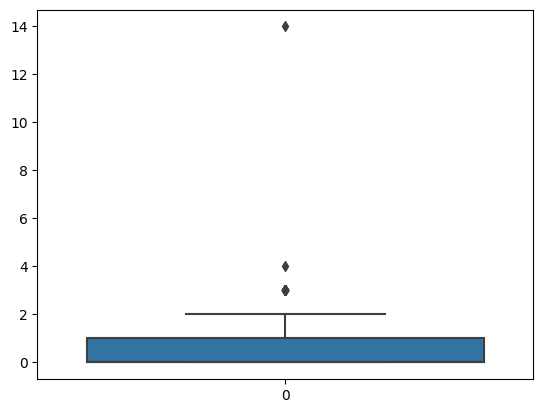

In [121]:
#create plot to detect outliers in children
sns.boxplot(cc_df_clean['Children'])

<Axes: >

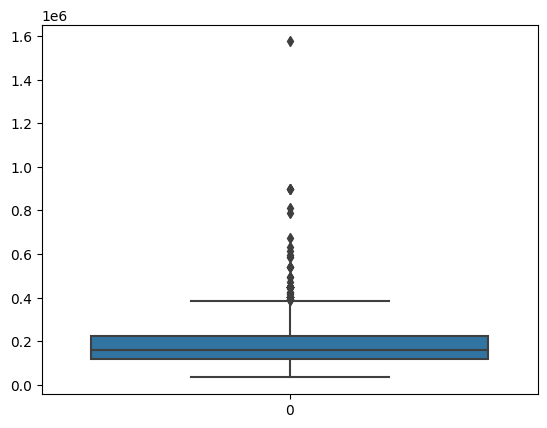

In [122]:
#create plot to detect outliers in Income
sns.boxplot(cc_df_clean['Income'])

<Axes: >

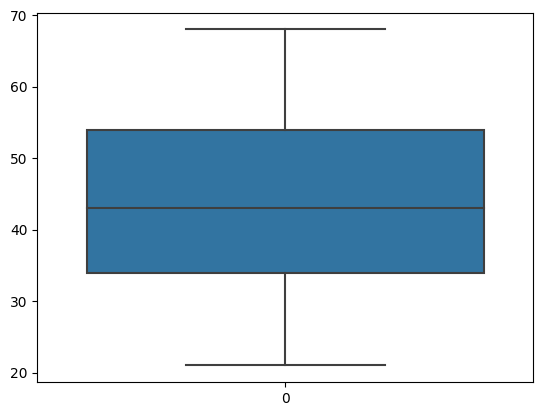

In [123]:
#create plot to detect outliers in Age
sns.boxplot(cc_df_clean['Age_In_Years'])

<Axes: >

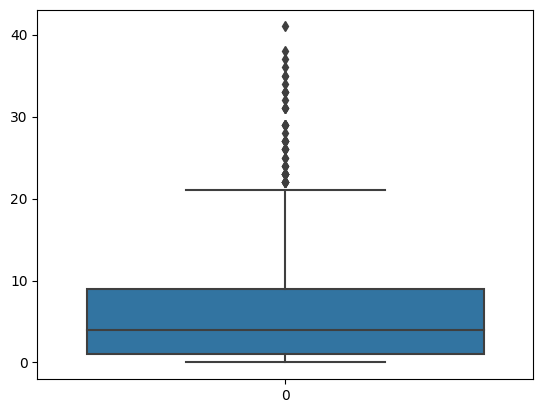

In [124]:
#create plot to detect outliers in Employment
sns.boxplot(cc_df_clean['Employed_In_Years'])

<Axes: >

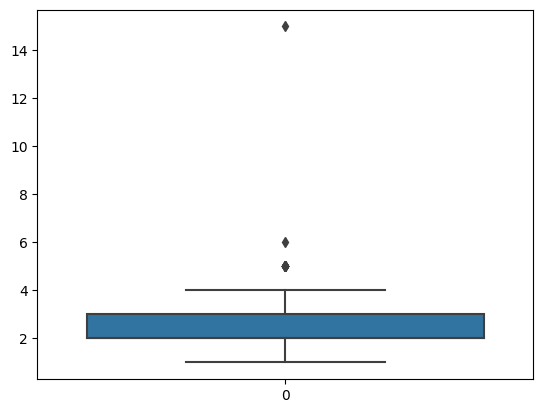

In [125]:
#create plot to detect outliers in Family Size
sns.boxplot(cc_df_clean['Family_Size'])

### Removing Outliers

In [126]:
high_bound = cc_df_clean['Children'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = cc_df_clean['Children'].quantile(0.001)
print('low_bound :', low_bound)
cc_df_clean = cc_df_clean[(cc_df_clean['Children']>=low_bound) & (cc_df_clean['Children']<=high_bound)]

high_bound : 3.6760000000001583
low_bound : 0.0


In [127]:
high_bound = cc_df_clean['Income'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = cc_df_clean['Income'].quantile(0.001)
print('low_bound :', low_bound)
cc_df_clean = cc_df_clean[(cc_df_clean['Income']>=low_bound) & (cc_df_clean['Income']<=high_bound)]

high_bound : 900000.0
low_bound : 36579.6


In [128]:
high_bound = cc_df_clean['Employed_In_Years'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = cc_df_clean['Employed_In_Years'].quantile(0.001)
print('low_bound :', low_bound)
cc_df_clean = cc_df_clean[(cc_df_clean['Employed_In_Years']>=low_bound) & (cc_df_clean['Employed_In_Years']<=high_bound)]

high_bound : 37.68100000000004
low_bound : 0.0


In [129]:
high_bound = cc_df_clean['Family_Size'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = cc_df_clean['Family_Size'].quantile(0.001)
print('low_bound :', low_bound)
cc_df_clean = cc_df_clean[(cc_df_clean['Family_Size']>=low_bound) & (cc_df_clean['Family_Size']<=high_bound)]

high_bound : 5.0
low_bound : 1.0


In [130]:
cc_df_clean.head()

,ID,Gender,Car_Owner,Prop_Owner,Children,Income,Income_Type,Education,Marital_Status,Housing_Type,Age_In_Years,Employed_In_Years,Family_Size
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,-0.0,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,-0.0,2
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,50.0,2.0,3
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,50.0,2.0,3


In [131]:
cc_label_df = pd.read_csv('./Credit_card_label.csv')

In [132]:
cc_label_df = cc_label_df.rename(columns={'Ind_ID':'ID'})
cc_label_df.sample(5)

,ID,label
333,5068491,0
996,5029225,0
396,5125325,0
1538,5125816,0
63,5054525,1


In [133]:
final_df = pd.merge(cc_df_clean, cc_label_df, on='ID', how='inner')

In [134]:
final_df.shape

(1318, 14)

In [135]:
# dropping 'ID' column as it is having only unique values (not required for ML Model)
# final_df.drop('ID', axis=1, inplace=True)

In [136]:
# checking if there are still duplicate rows in Final Dataframe
len(final_df) - len(final_df.drop_duplicates())

0

In [137]:
# Dropping duplicate records
final_df = final_df.drop_duplicates()
final_df.reset_index(drop=True ,inplace=True)

In [138]:
final_df.shape

(1318, 14)

In [139]:
final_df.isna().sum()

ID                   0
Gender               0
Car_Owner            0
Prop_Owner           0
Children             0
Income               0
Income_Type          0
Education            0
Marital_Status       0
Housing_Type         0
Age_In_Years         0
Employed_In_Years    0
Family_Size          0
label                0
dtype: int64

In [140]:
corr_df = final_df[['Children', 'Income', 'Age_In_Years', 'Employed_In_Years', 'Family_Size', 'label']]

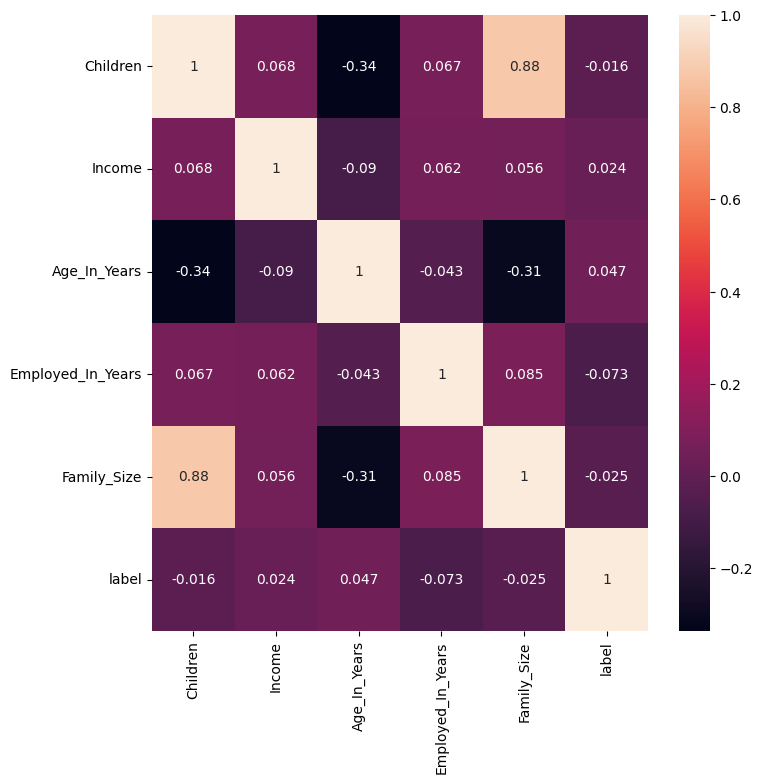

In [141]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'label'
plt.figure(figsize = (8,8))
sns.heatmap(corr_df.corr(), annot=True)
plt.show()

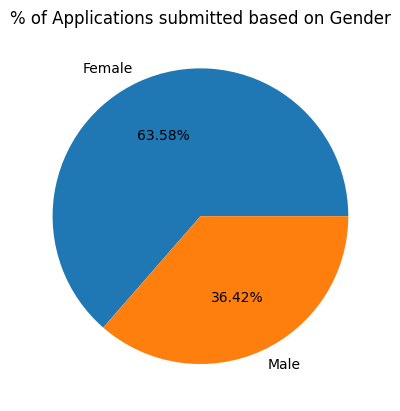

In [142]:
# This graph shows that, majority of application are submitted by Females
plt.pie(final_df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

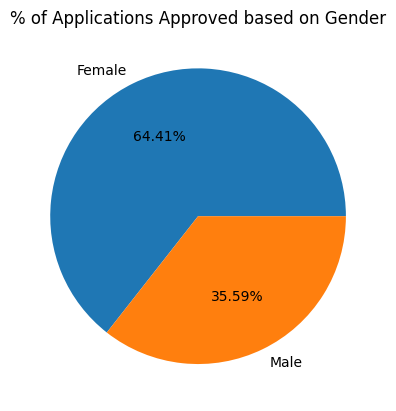

In [143]:
# This graph shows that, majority of application are approved for Females
plt.pie(final_df[final_df['label']==0]['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

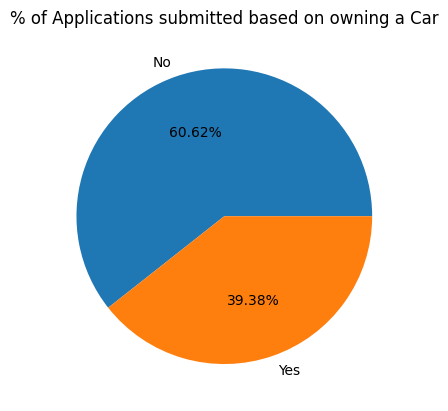

In [144]:
# This graph shows that, majority of applicatant's dont own a car
plt.pie(final_df['Car_Owner'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

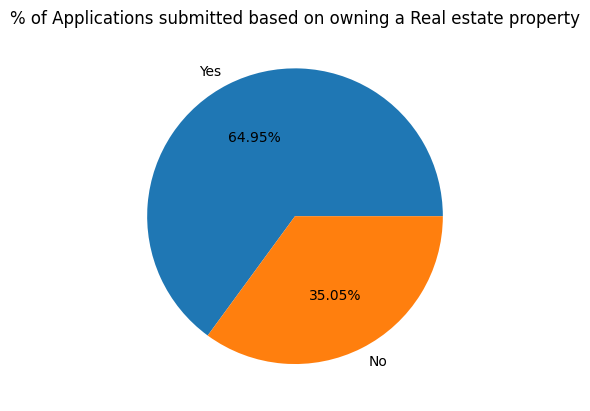

In [145]:
# This graph shows that, majority of applicatant's own a Real Estate property / House
plt.pie(final_df['Prop_Owner'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

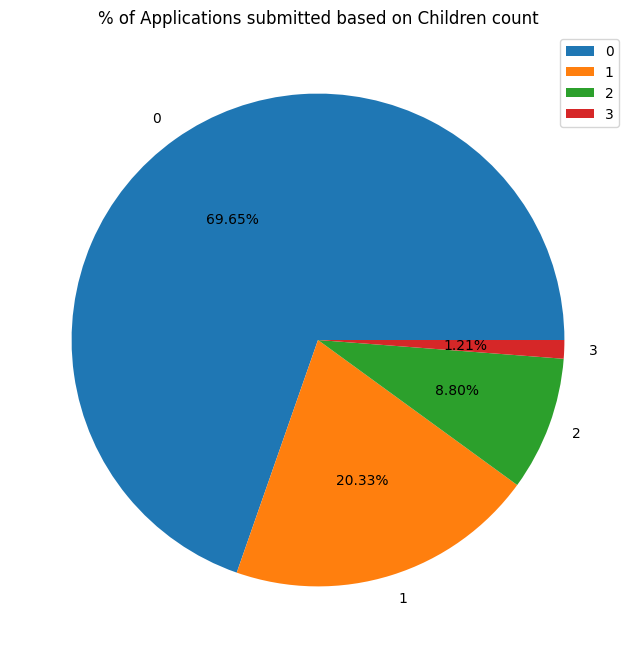

In [146]:
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(final_df['Children'].value_counts(), labels=final_df['Children'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

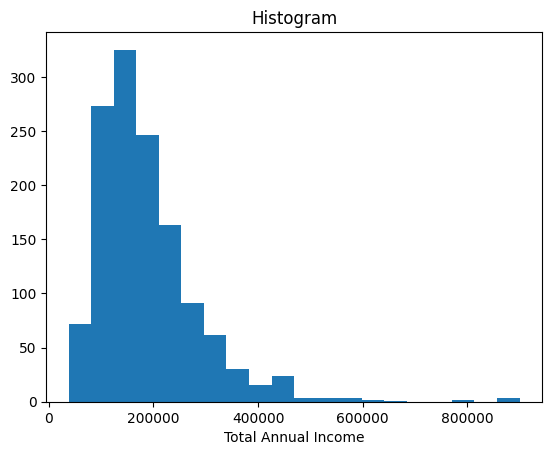

In [147]:
# This graph shows that, majority of applicatant's income lies between 1 to 3 lakh
plt.hist(final_df['Income'], bins=20)
plt.xlabel('Total Annual Income')
plt.title('Histogram')
plt.show()

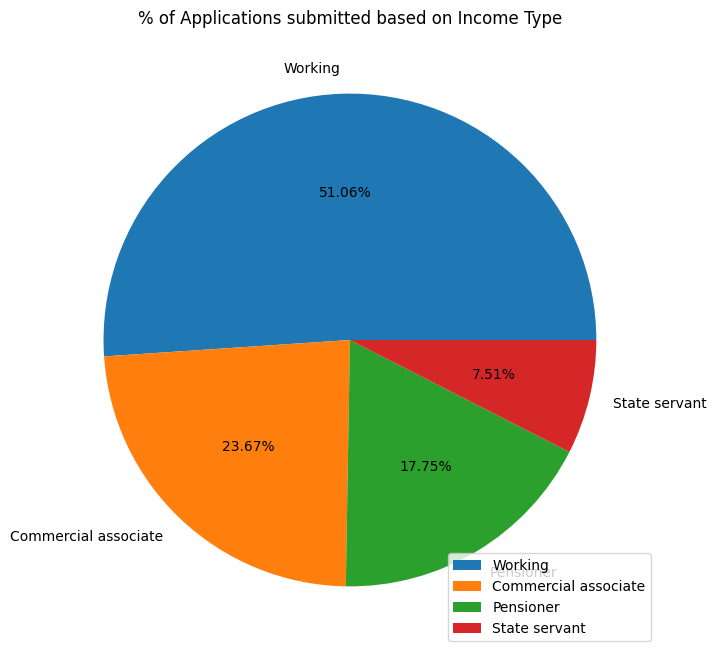

In [148]:
# This graph shows that, majority of applicatant's are working professional
plt.figure(figsize = (8,8))
plt.pie(final_df['Income_Type'].value_counts(), labels=final_df['Income_Type'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

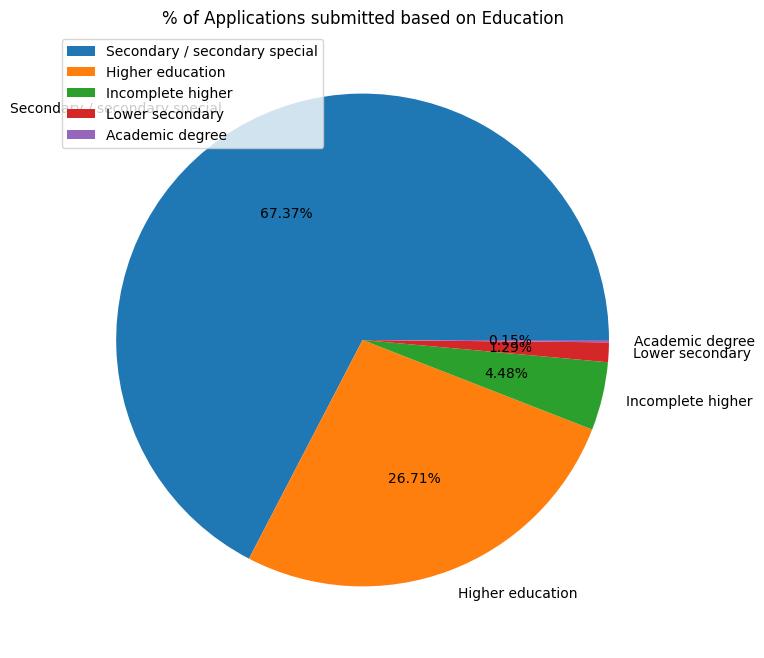

In [149]:
# This graph shows that, majority of applicatant's completed the Secondary Education
plt.figure(figsize=(8,8))
plt.pie(final_df['Education'].value_counts(), labels=final_df['Education'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Education')
plt.legend()
plt.show()

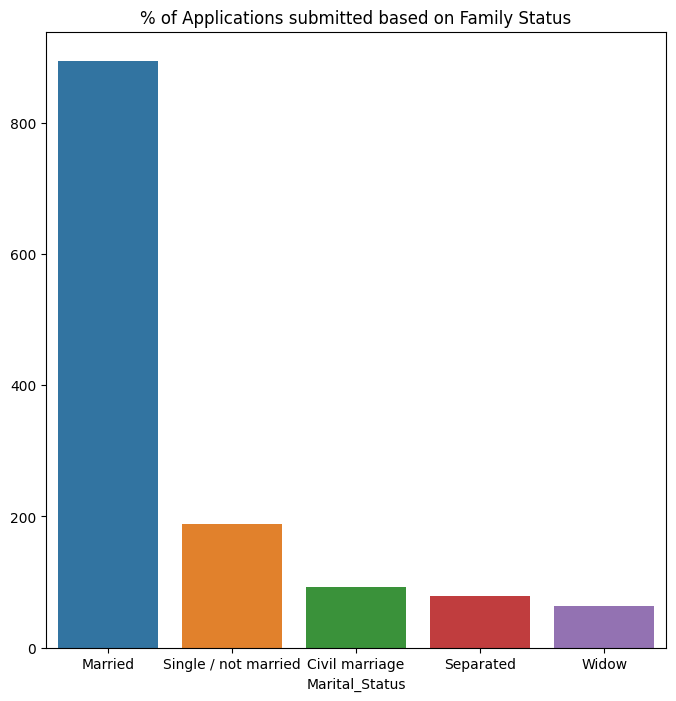

In [150]:
# This graph shows that, majority of applicatant's are married
plt.figure(figsize=(8,8))
sns.barplot(x=final_df['Marital_Status'].value_counts().index, y=final_df['Marital_Status'].value_counts().values)
plt.title('% of Applications submitted based on Family Status')
plt.show()

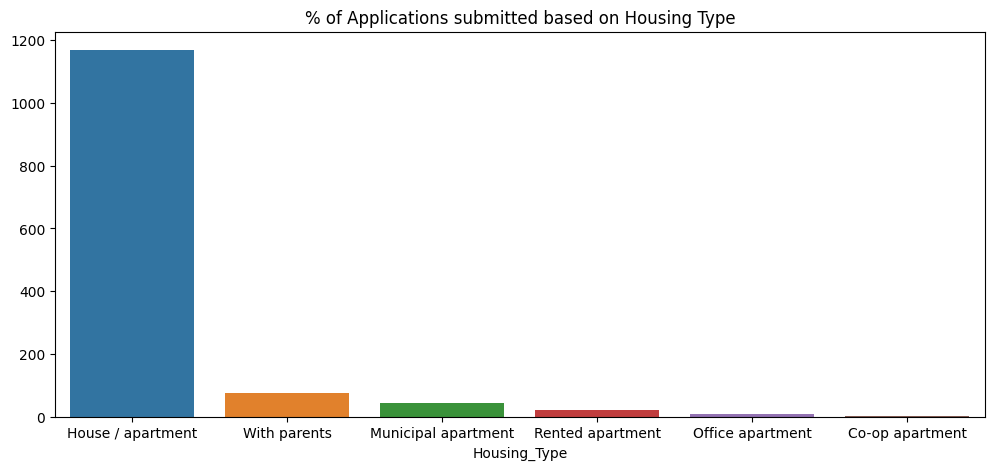

In [151]:
# This graph shows that, majority of applicatant's lives in House / Apartment
plt.figure(figsize=(12,5))
sns.barplot(x=final_df['Housing_Type'].value_counts().index, y=final_df['Housing_Type'].value_counts().values)
plt.title('% of Applications submitted based on Housing Type')
plt.show()

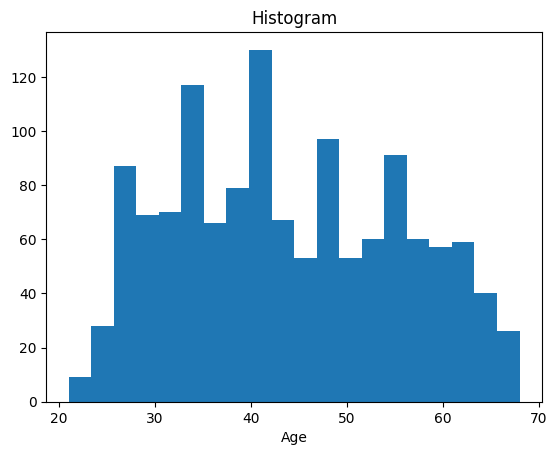

In [152]:
# This graph shows that, majority of applicatant's are 25 to 65 years old
plt.hist(final_df['Age_In_Years'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

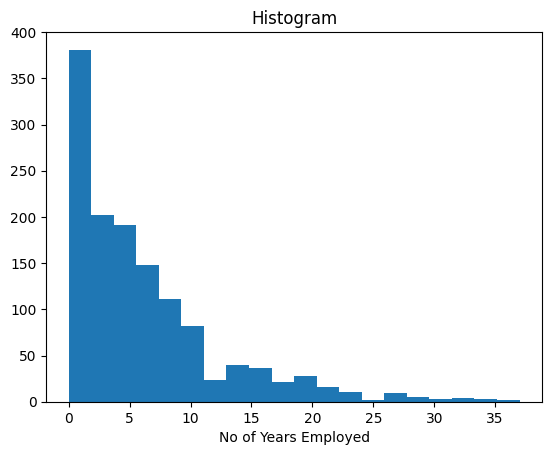

In [153]:
# This graph shows that, majority of applicatant's are Employed for 0 to 7 years
plt.hist(final_df['Employed_In_Years'], bins=20)
plt.xlabel('No of Years Employed')
plt.title('Histogram')
plt.show()

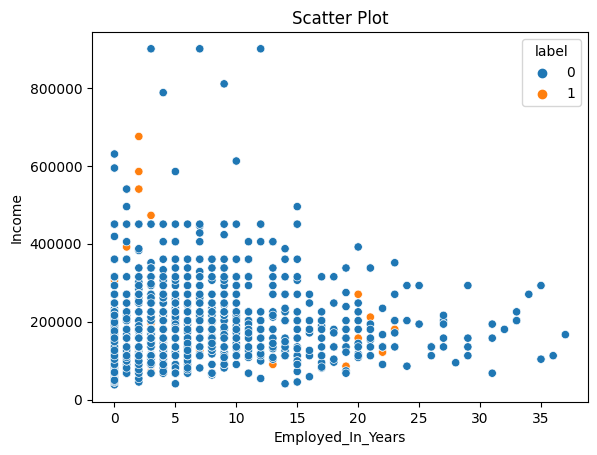

In [154]:
# This graph shows that, majority of applications are rejected if Total income & years of Employment is less
sns.scatterplot(x=final_df['Employed_In_Years'], y=final_df['Income'], hue=final_df['label'])
plt.title('Scatter Plot')
plt.show()

In [155]:
cat_columns = final_df.columns[(final_df.dtypes =='object').values].tolist()
cat_columns

['Gender',
 'Car_Owner',
 'Prop_Owner',
 'Income_Type',
 'Education',
 'Marital_Status',
 'Housing_Type']

In [156]:
#Converting all Non-Numerical Columns to Numerical
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store LabelEncoder instances
label_encoders = {}

# Loop through categorical columns
for col in cat_columns:
    label_encoders[col] = LabelEncoder()
    final_df[col] = label_encoders[col].fit_transform(final_df[col])

final_df.head(5)

,ID,Gender,Car_Owner,Prop_Owner,Children,Income,Income_Type,Education,Marital_Status,Housing_Type,Age_In_Years,Employed_In_Years,Family_Size,label
0,5008827,1,1,1,0,180000.0,1,1,1,1,51.0,-0.0,2,1
1,5009744,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,2,1
2,5009894,0,0,0,0,180000.0,1,4,1,1,61.0,-0.0,2,1
3,5010864,1,1,1,1,450000.0,0,4,1,1,50.0,2.0,3,1
4,5010868,1,1,1,1,450000.0,1,4,1,1,50.0,2.0,3,1


In [157]:
# Create a dictionary to store LabelEncoder instances
label_encoders = {}

# Loop through categorical columns
for col in cat_columns:
    label_encoders[col] = LabelEncoder()
    final_df[col] = label_encoders[col].fit_transform(final_df[col])
    print(col, " : ", label_encoders[col].classes_)

Gender  :  [0 1]
Car_Owner  :  [0 1]
Prop_Owner  :  [0 1]
Income_Type  :  [0 1 2 3]
Education  :  [0 1 2 3 4]
Marital_Status  :  [0 1 2 3 4]
Housing_Type  :  [0 1 2 3 4 5]


In [158]:
final_df.corr()

,ID,Gender,Car_Owner,Prop_Owner,Children,Income,Income_Type,Education,Marital_Status,Housing_Type,Age_In_Years,Employed_In_Years,Family_Size,label
ID,1.000000,0.015411,-0.048899,-0.060781,0.029487,0.006970,0.025762,0.043423,0.024880,0.026615,-0.028325,0.021896,0.007157,0.004696
Gender,0.015411,1.000000,0.371075,-0.032203,0.052669,0.241666,0.071178,-0.028664,-0.123561,0.068846,-0.180391,-0.040960,0.091848,0.054240
Car_Owner,-0.048899,0.371075,1.000000,-0.000242,0.058039,0.218375,0.023030,-0.116992,-0.144625,-0.005647,-0.128568,-0.005643,0.122333,-0.024992
Prop_Owner,-0.060781,-0.032203,-0.000242,1.000000,-0.024737,0.044285,-0.063619,-0.014594,-0.007709,-0.172394,0.131776,-0.062933,-0.012688,-0.008733
Children,0.029487,0.052669,0.058039,-0.024737,1.000000,0.068409,0.072290,-0.073929,-0.185995,0.015479,-0.335700,0.067412,0.879503,-0.016148
Income,0.006970,0.241666,0.218375,0.044285,0.068409,1.000000,-0.102004,-0.243715,-0.029726,0.024999,-0.090201,0.062499,0.055903,0.023564
Income_Type,0.025762,0.071178,0.023030,-0.063619,0.072290,-0.102004,1.000000,0.071213,-0.018150,0.029881,-0.180582,0.199912,0.067189,-0.070325
Education,0.043423,-0.028664,-0.116992,-0.014594,-0.073929,-0.243715,0.071213,1.000000,0.073802,-0.050688,0.184396,0.010837,-0.083910,-0.011629
Marital_Status,0.024880,-0.123561,-0.144625,-0.007709,-0.185995,-0.029726,-0.018150,0.073802,1.000000,-0.005067,0.131579,-0.084519,-0.570586,0.066619
Housing_Type,0.026615,0.068846,-0.005647,-0.172394,0.015479,0.024999,0.029881,-0.050688,-0.005067,1.000000,-0.222024,-0.036102,0.007225,-0.015570


In [159]:
features = final_df.drop(['label'], axis=1)
target = final_df['label']

In [160]:
features.head()

,ID,Gender,Car_Owner,Prop_Owner,Children,Income,Income_Type,Education,Marital_Status,Housing_Type,Age_In_Years,Employed_In_Years,Family_Size
0,5008827,1,1,1,0,180000.0,1,1,1,1,51.0,-0.0,2
1,5009744,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,2
2,5009894,0,0,0,0,180000.0,1,4,1,1,61.0,-0.0,2
3,5010864,1,1,1,1,450000.0,0,4,1,1,50.0,2.0,3
4,5010868,1,1,1,1,450000.0,1,4,1,1,50.0,2.0,3


In [161]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state = 10)

In [163]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)
lg_score = model_lg.score(x_test, y_test)*100
print('Logistic Model Accuracy : ', lg_score, '%')

prediction = model_lg.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Logistic Model Accuracy :  90.9090909090909 %

Confusion matrix :
[[240   0]
 [ 24   0]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       240
           1       0.00      0.00      0.00        24

    accuracy                           0.91       264
   macro avg       0.45      0.50      0.48       264
weighted avg       0.83      0.91      0.87       264



In [164]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(max_depth=12,min_samples_split=8)
model_dtc.fit(x_train, y_train)
dtc_score = model_dtc.score(x_test, y_test)*100
print('Decision Tree Model Accuracy : ', dtc_score, '%')

prediction = model_dtc.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Decision Tree Model Accuracy :  86.74242424242425 %

Confusion matrix :
[[227  13]
 [ 22   2]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       240
           1       0.13      0.08      0.10        24

    accuracy                           0.87       264
   macro avg       0.52      0.51      0.52       264
weighted avg       0.84      0.87      0.85       264



In [165]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)
model_rfc.fit(x_train, y_train)
rfc_score = model_rfc.score(x_test, y_test)*100
print('Random Forest Model Accuracy : ', rfc_score, '%')

prediction = model_rfc.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Random Forest Model Accuracy :  90.9090909090909 %

Confusion matrix :
[[240   0]
 [ 24   0]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       240
           1       0.00      0.00      0.00        24

    accuracy                           0.91       264
   macro avg       0.45      0.50      0.48       264
weighted avg       0.83      0.91      0.87       264



In [166]:
# K Nearest Neighbor classification

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 7)
model_knn.fit(x_train, y_train)
knn_score = model_knn.score(x_test, y_test)*100
print('KNN Model Accuracy : ', knn_score, '%')

prediction = model_knn.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

KNN Model Accuracy :  90.9090909090909 %

Confusion matrix :
[[240   0]
 [ 24   0]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       240
           1       0.00      0.00      0.00        24

    accuracy                           0.91       264
   macro avg       0.45      0.50      0.48       264
weighted avg       0.83      0.91      0.87       264



In [167]:
# XGBoost  classification

from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)
xgb_score = model_xgb.score(x_test, y_test)*100
print('XGBoost Model Accuracy : ', xgb_score, '%')

prediction = model_xgb.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

XGBoost Model Accuracy :  90.15151515151516 %

Confusion matrix :
[[236   4]
 [ 22   2]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       240
           1       0.33      0.08      0.13        24

    accuracy                           0.90       264
   macro avg       0.62      0.53      0.54       264
weighted avg       0.86      0.90      0.87       264



#### Comparing the performance of the models

In [168]:
models = pd.DataFrame({
    'Model': ["LogisticRegression", "Decision Tree Classifier", "RandomForestClassifier", 
              "KNN", "XGBoost"],
    'Score': [lg_score, dtc_score, rfc_score, knn_score, xgb_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,LogisticRegression,90.909091
2,RandomForestClassifier,90.909091
3,KNN,90.909091
4,XGBoost,90.151515
1,Decision Tree Classifier,86.742424


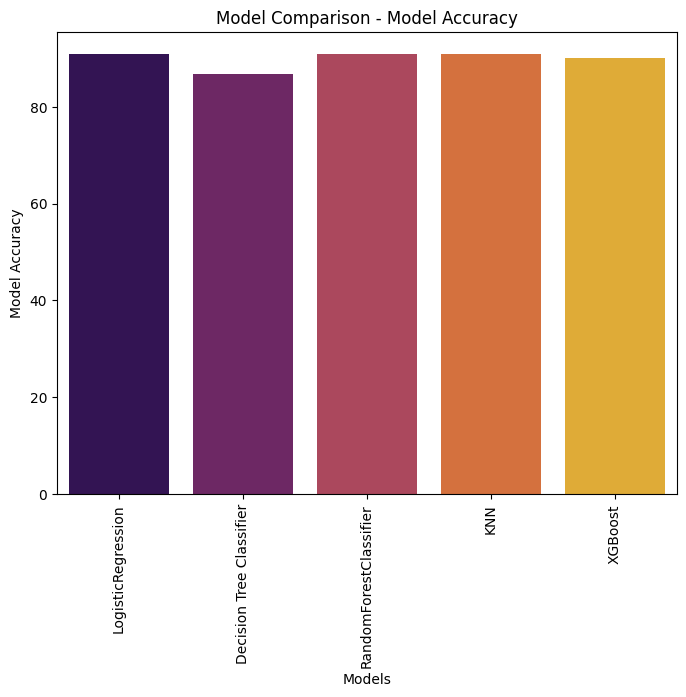

In [169]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=models.Model,y=models.Score, palette="inferno");
plt.xlabel("Models")
plt.ylabel("Model Accuracy")
plt.xticks(rotation=90)
plt.title("Model Comparison - Model Accuracy");

#### As logistics regression, Random Forest and Knn are having the same accuracy we can use any of these.

In [170]:
final_df.sample(5)

,ID,Gender,Car_Owner,Prop_Owner,Children,Income,Income_Type,Education,Marital_Status,Housing_Type,Age_In_Years,Employed_In_Years,Family_Size,label
663,5087829,1,0,1,0,135000.0,2,4,1,4,29.0,6.0,2,0
185,5117314,1,0,1,1,292500.0,3,4,1,1,46.0,5.0,3,0
736,5052678,0,0,1,1,135000.0,3,1,1,1,43.0,22.0,3,0
312,5047789,0,1,1,0,225000.0,0,1,1,1,29.0,3.0,2,0
1289,5024077,0,1,1,0,157500.0,1,4,4,1,56.0,-0.0,1,0


### Prediction

In [172]:
ID = 12345
Gender = 1
Car_Owner = 1
Prop_Owner = 0
Children = 0
Income = 225000.0
Income_Type = 3
Education = 4
Marital_Status = 1
Housing_Type = 2
Age_In_Years = 35
Employed_In_Years = 8
Family_Size = 2

test1 = [ID, Gender, Car_Owner, Prop_Owner, Children, Income, Income_Type, Education, Marital_Status, 
        Housing_Type, Age_In_Years, Employed_In_Years, Family_Size]

model = model_lg
pred = model.predict([test1])
# print(pred)
if pred==1:
    print('Rejected')
else:
    print('Approved')

Approved


In [173]:
ID = 54321
Gender = 0
Car_Owner = 0
Prop_Owner = 1
Children = 2
Income = 100000.0
Income_Type = 3
Education = 4
Marital_Status = 1
Housing_Type = 2
Age_In_Years = 40
Employed_In_Years = 12
Family_Size = 4

test2 = [ID, Gender, Car_Owner, Prop_Owner, Children, Income, Income_Type, Education, Marital_Status, 
        Housing_Type, Age_In_Years, Employed_In_Years, Family_Size]

model = model_lg
pred = model.predict([test2])
# print(pred)
if pred==1:
    print('Rejected')
else:
    print('Approved')

Approved
